In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing / double exponential smooting
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [3]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:>

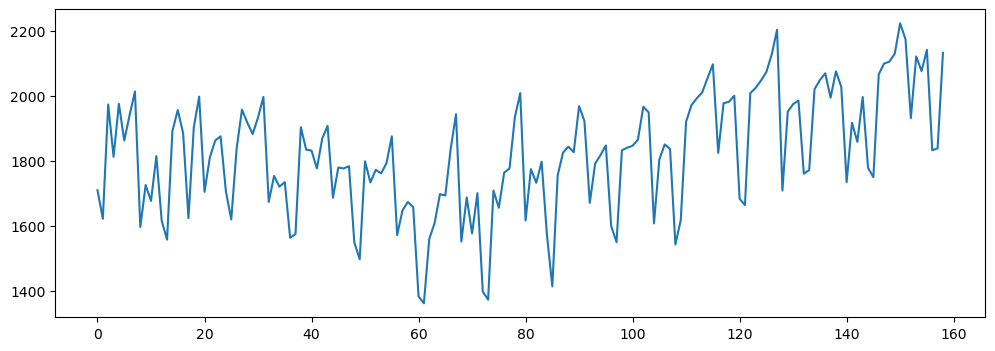

In [4]:
plt.figure(figsize=(12,4))
Walmart = pd.read_csv("footfalls.csv")
Walmart.Footfalls.plot()

In [5]:
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [6]:
13*12+3

159

# Splitting data

In [7]:

Train = Walmart.head(147)
Test = Walmart.tail(12)


# Moving Average 

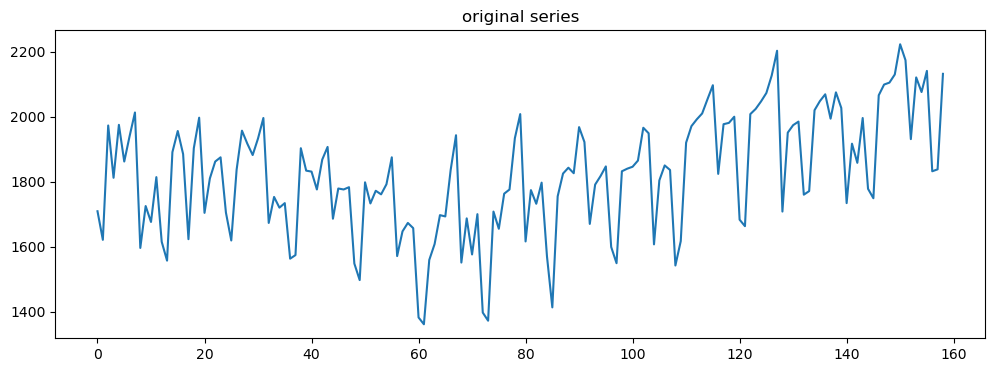

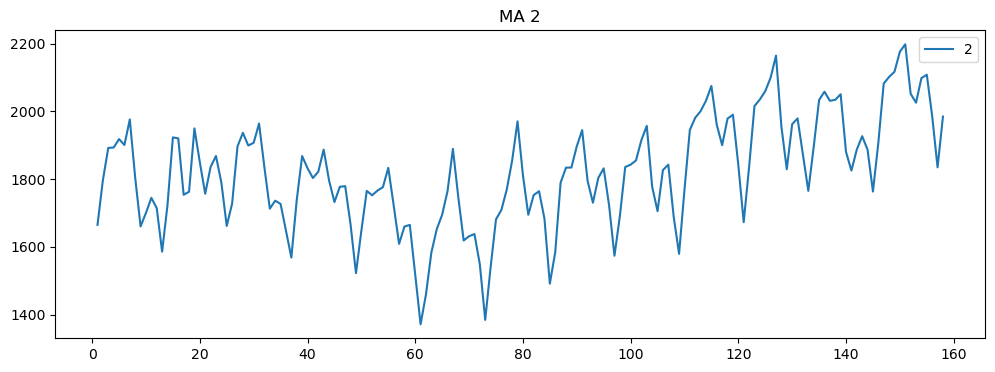

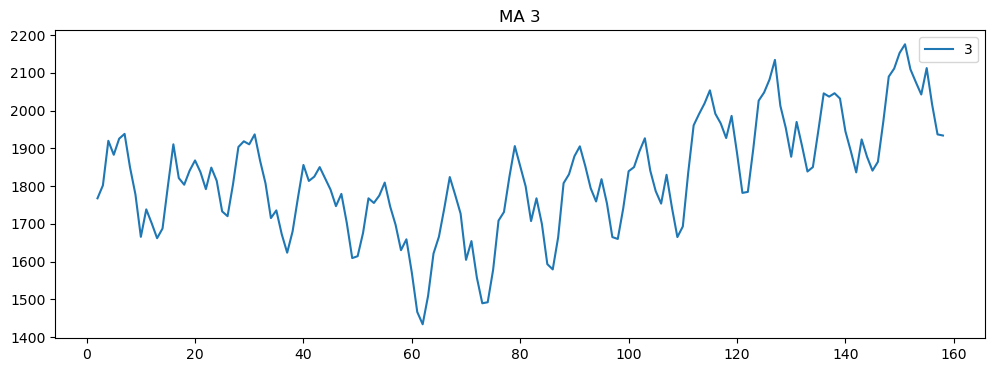

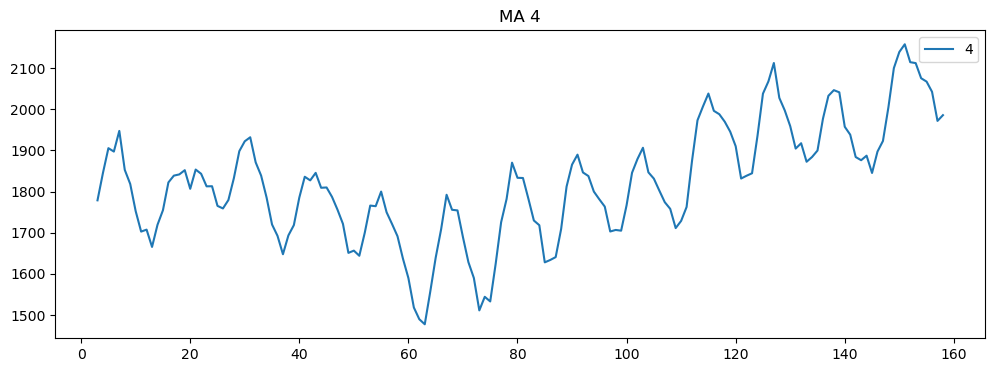

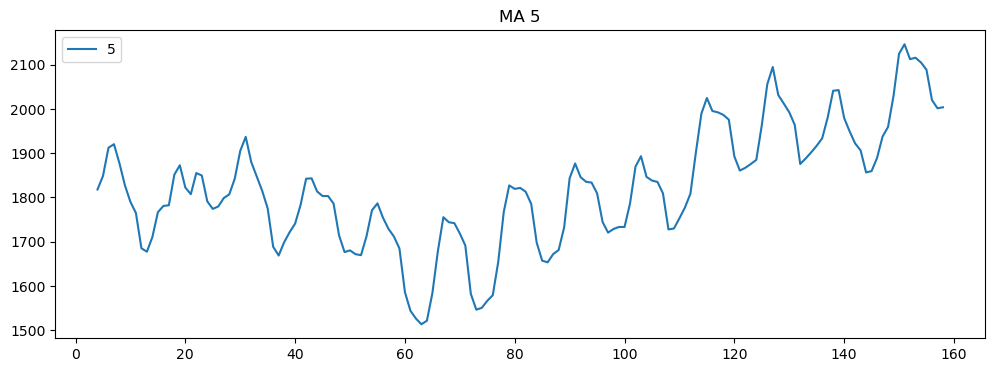

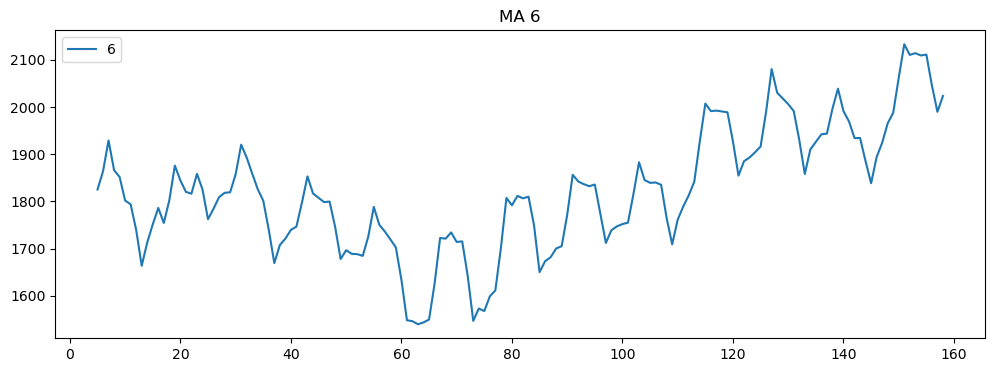

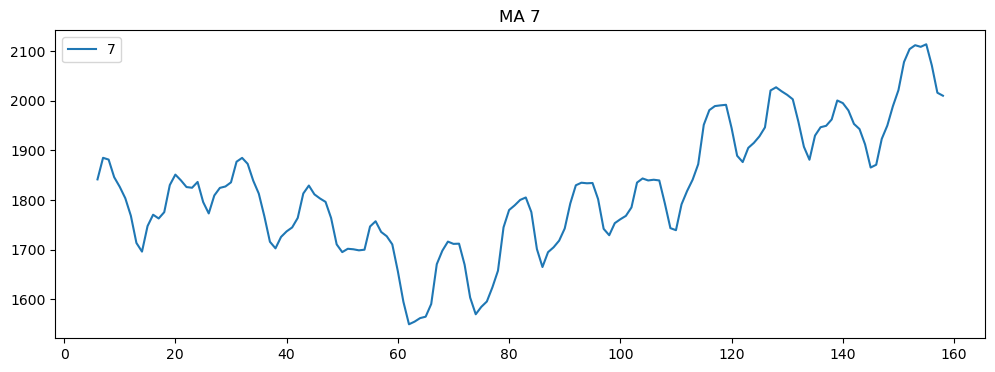

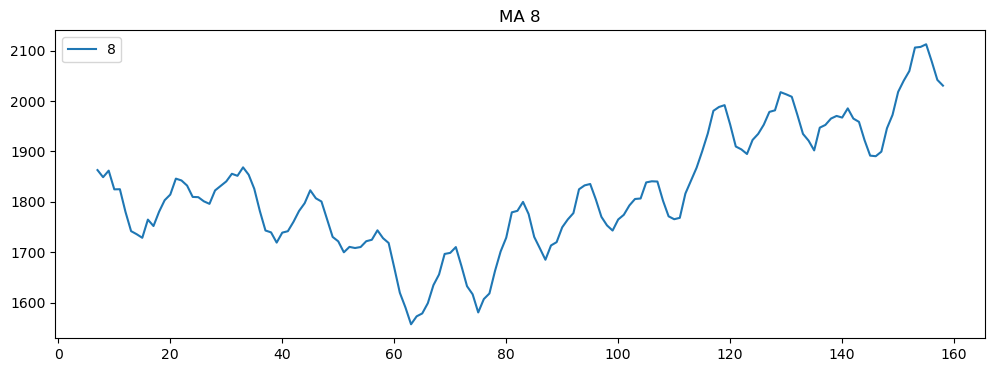

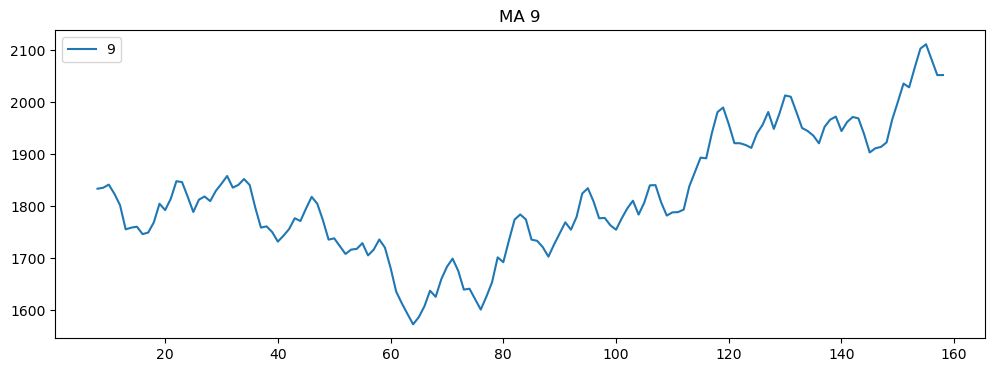

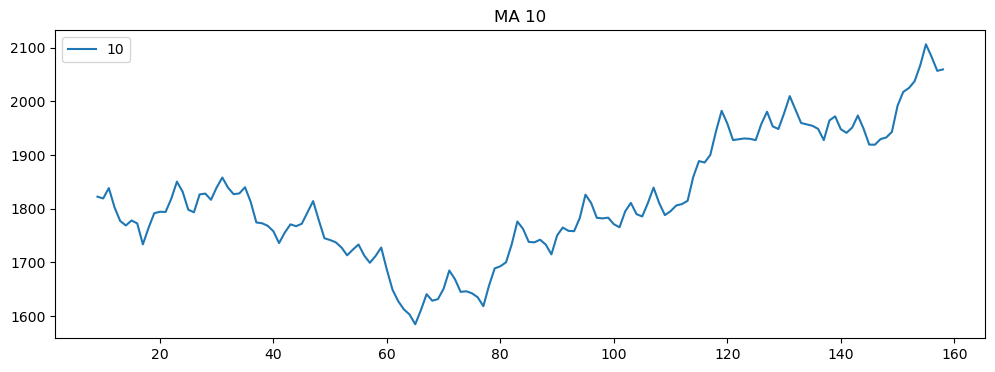

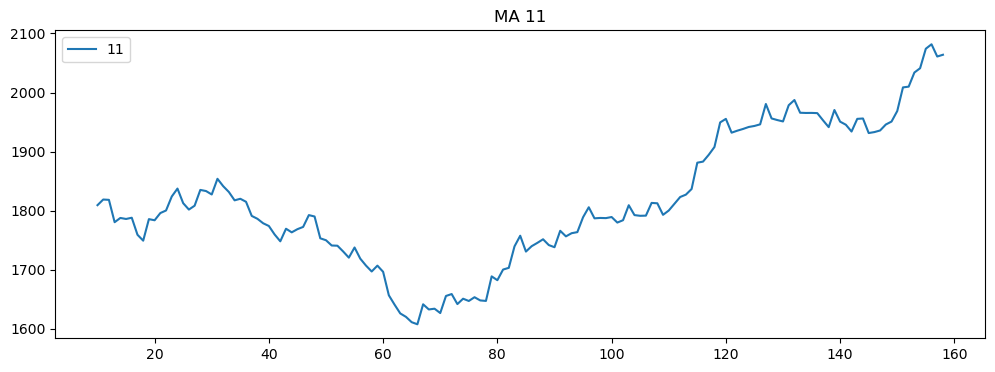

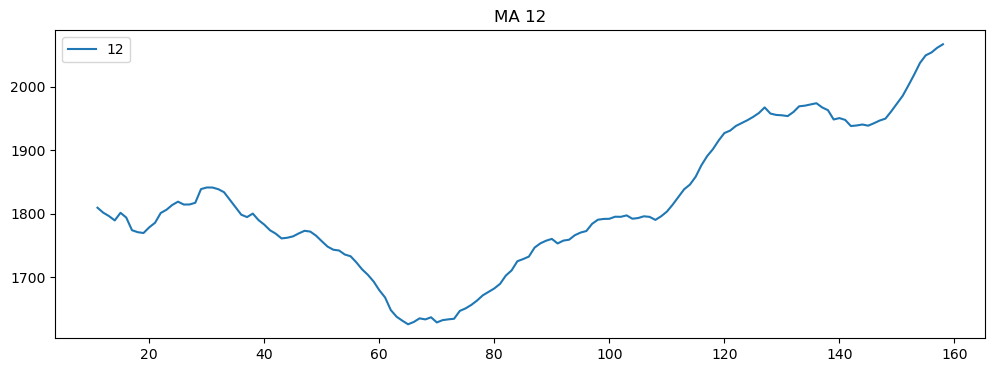

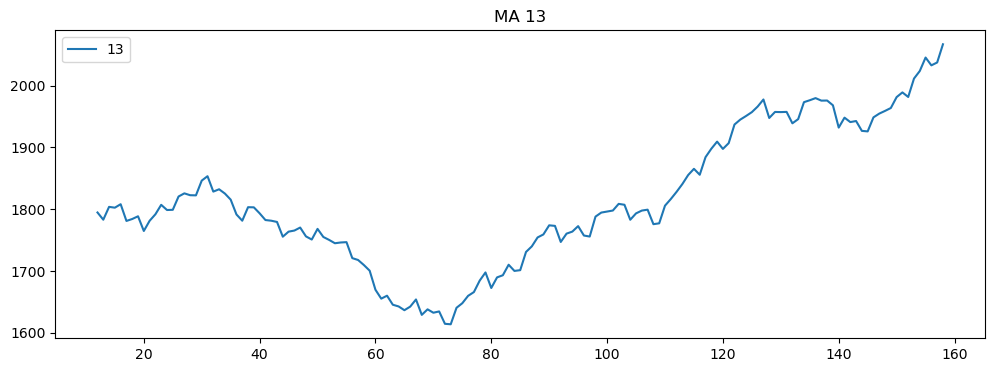

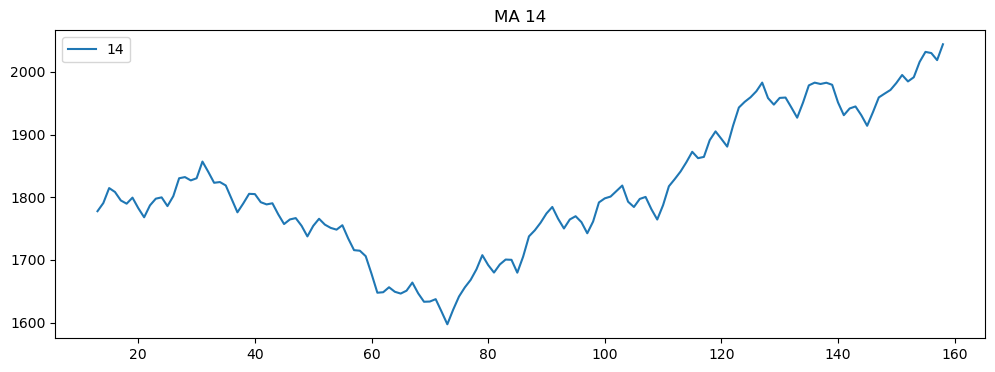

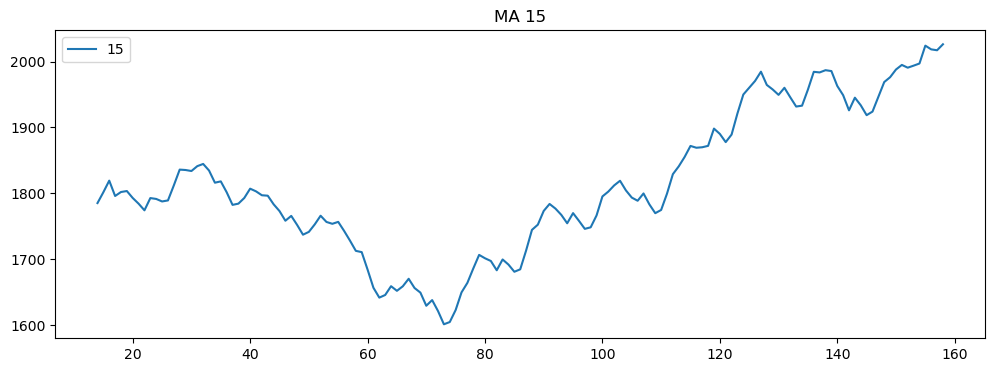

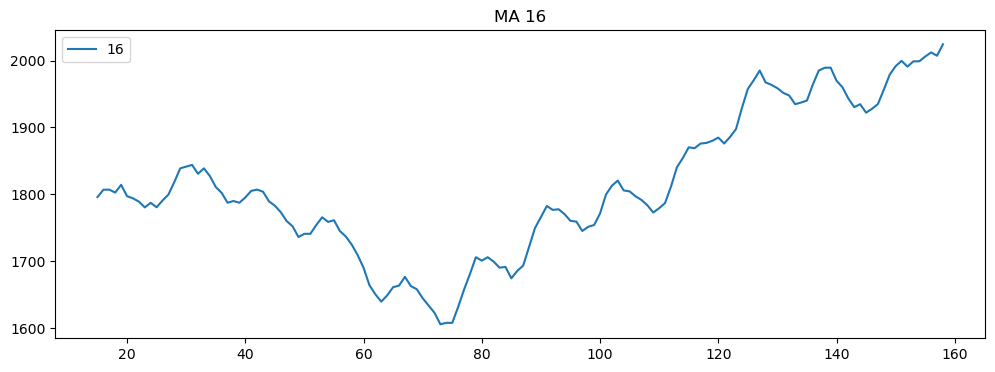

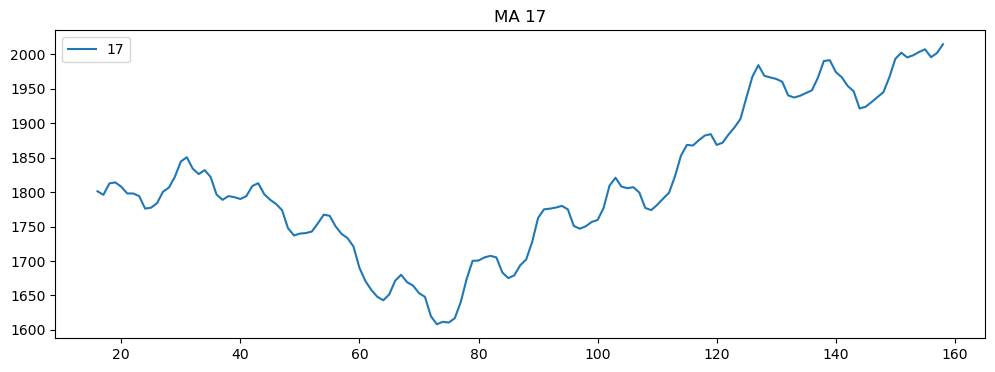

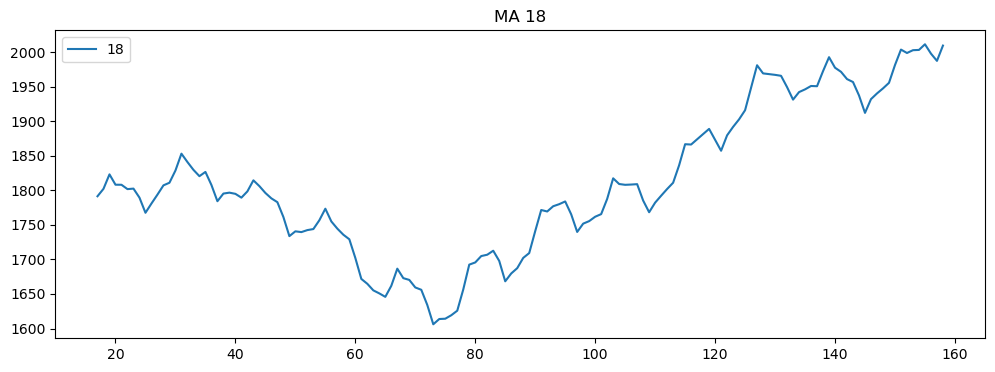

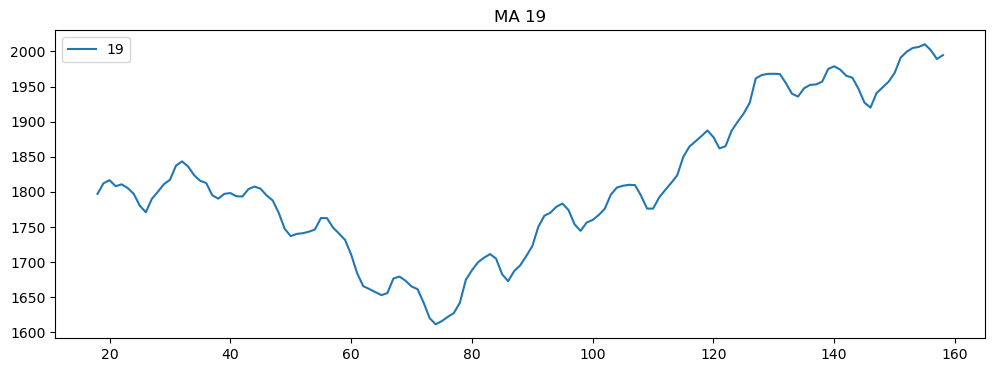

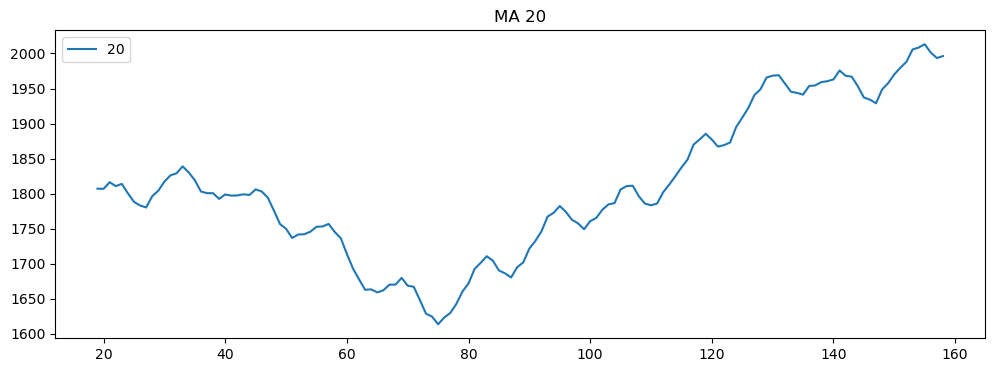

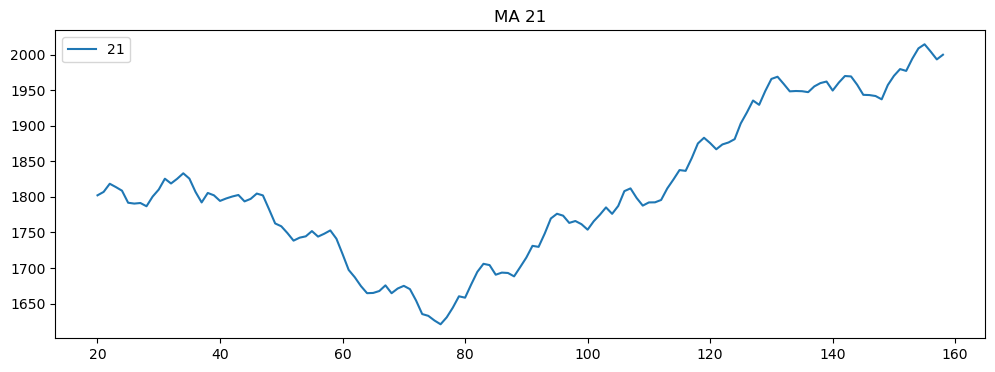

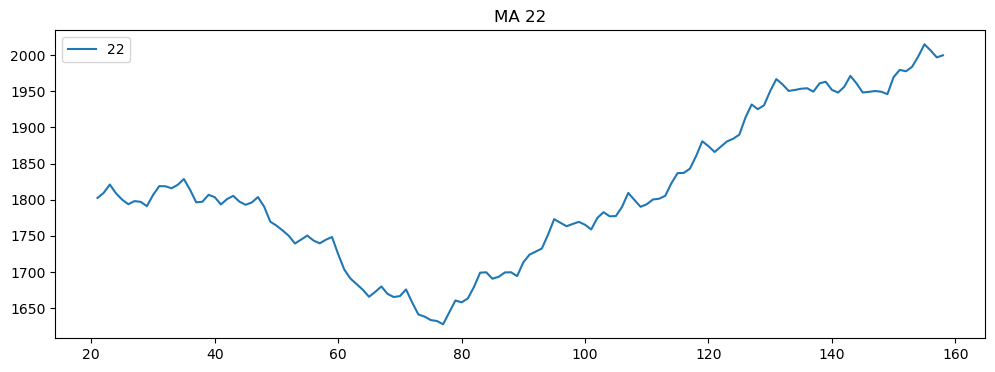

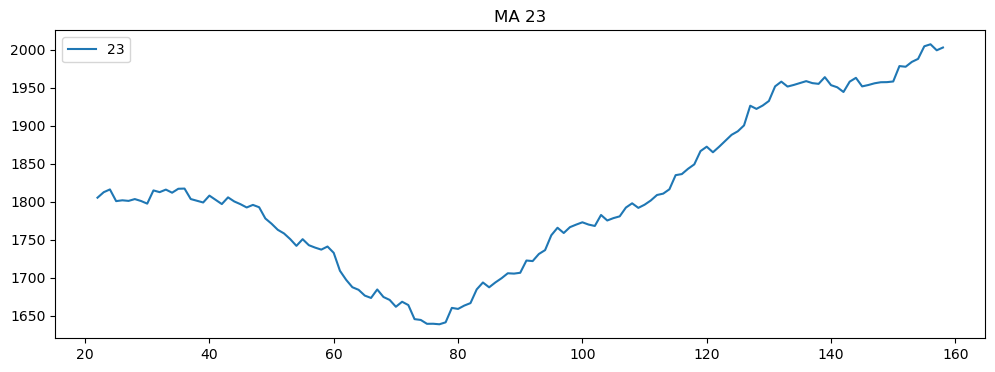

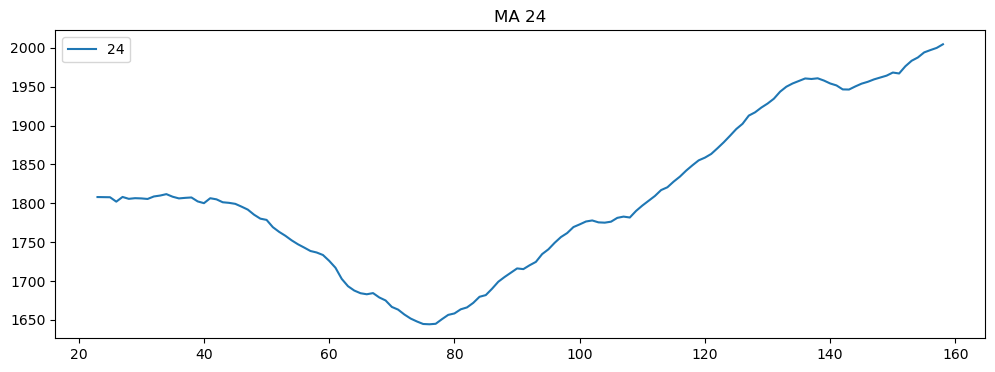

In [8]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
plt.title("original series")

for i in range(2,25):
    plt.figure(figsize=(12,4))


    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("MA "+str(i))
    plt.legend(loc='best')
    plt.show()

### Evaluation Metric MAPE

In [9]:
"""mean absolute percentage error
sum(|(ypre-y)/y|+...)/n
act=1,2,3
predicted=2,6,9

"""

'mean absolute percentage error\nsum(|(ypre-y)/y|+...)/n\nact=1,2,3\npredicted=2,6,9\n\n'

In [10]:
def MAPE(org,pred):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [11]:
y=1000
y_pred=999

y=3
y_pred=2


(y-y_pred)/y

0.3333333333333333

In [12]:
Train["Footfalls"]

0      1709
1      1621
2      1973
3      1812
4      1975
       ... 
142    1858
143    1996
144    1778
145    1749
146    2066
Name: Footfalls, Length: 147, dtype: int64

In [13]:
Test.index[0]

147

In [14]:
Test.index[-1]

158

### Simple Exponential Method


In [26]:
# ln=0.2ln-1 +0.8 yn

In [16]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 
#

9.373681526460608

In [17]:
pred_ses

147    1913.677017
148    1913.677017
149    1913.677017
150    1913.677017
151    1913.677017
152    1913.677017
153    1913.677017
154    1913.677017
155    1913.677017
156    1913.677017
157    1913.677017
158    1913.677017
dtype: float64

In [18]:
import numpy as np
x=np.linspace(0.1,1,20)
for i in x :
    ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score=MAPE(pred_ses,Test.Footfalls) 
    print("smoothing_level ",i,"-->","MAPE Error",score)


smoothing_level  0.1 --> MAPE Error 8.93947324044705
smoothing_level  0.1473684210526316 --> MAPE Error 9.1535831070263
smoothing_level  0.19473684210526315 --> MAPE Error 9.356951230289402
smoothing_level  0.24210526315789474 --> MAPE Error 9.460209986703076
smoothing_level  0.2894736842105263 --> MAPE Error 9.460842937385406
smoothing_level  0.33684210526315794 --> MAPE Error 9.370557440619221
smoothing_level  0.38421052631578945 --> MAPE Error 9.203120359059552
smoothing_level  0.43157894736842106 --> MAPE Error 8.971671486475197
smoothing_level  0.4789473684210527 --> MAPE Error 8.688505829201876
smoothing_level  0.5263157894736842 --> MAPE Error 8.433575035096025
smoothing_level  0.5736842105263158 --> MAPE Error 8.150475504382735
smoothing_level  0.6210526315789474 --> MAPE Error 7.84338199972328
smoothing_level  0.6684210526315789 --> MAPE Error 7.515497890199613
smoothing_level  0.7157894736842105 --> MAPE Error 7.169467589160548
smoothing_level  0.7631578947368421 --> MAPE Err

### Holt method 

In [19]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

6.776570261063749

In [20]:
pred_hw

147    2021.566977
148    2044.942083
149    2068.317189
150    2091.692296
151    2115.067402
152    2138.442509
153    2161.817615
154    2185.192721
155    2208.567828
156    2231.942934
157    2255.318040
158    2278.693147
dtype: float64

In [21]:
import numpy as np
alphas=np.arange(0.1,1,0.1)
betas=np.arange(0.1,1,0.1)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=i, smoothing_slope=j)
        print(hw_model)
        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
        
        score=MAPE(pred_hw,Test.Footfalls)
        print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))

smoothing_level  0.1  smoothing_slope 0.1 --> MAPE Error 8.892755417531484
smoothing_level  0.1  smoothing_slope 0.2 --> MAPE Error 11.862700324883507
smoothing_level  0.1  smoothing_slope 0.30000000000000004 --> MAPE Error 13.746564043192926
smoothing_level  0.1  smoothing_slope 0.4 --> MAPE Error 12.552260429223148
smoothing_level  0.1  smoothing_slope 0.5 --> MAPE Error 12.077705411349648
smoothing_level  0.1  smoothing_slope 0.6 --> MAPE Error 12.800678847745635
smoothing_level  0.1  smoothing_slope 0.7000000000000001 --> MAPE Error 14.676125335395495
smoothing_level  0.1  smoothing_slope 0.8 --> MAPE Error 17.320487058551613
smoothing_level  0.1  smoothing_slope 0.9 --> MAPE Error 19.32764084642066
smoothing_level  0.2  smoothing_slope 0.1 --> MAPE Error 10.619311907815261
smoothing_level  0.2  smoothing_slope 0.2 --> MAPE Error 12.35439819013051
smoothing_level  0.2  smoothing_slope 0.30000000000000004 --> MAPE Error 13.265716989133216
smoothing_level  0.2  smoothing_slope 0.4 --

smoothing_level  0.6  smoothing_slope 0.6 --> MAPE Error 13.377480769142387
smoothing_level  0.6  smoothing_slope 0.7000000000000001 --> MAPE Error 15.828248934624405
smoothing_level  0.6  smoothing_slope 0.8 --> MAPE Error 18.185589134032465
smoothing_level  0.6  smoothing_slope 0.9 --> MAPE Error 20.547198392643608
smoothing_level  0.7000000000000001  smoothing_slope 0.1 --> MAPE Error 6.758998091032563
smoothing_level  0.7000000000000001  smoothing_slope 0.2 --> MAPE Error 6.066026656322335
smoothing_level  0.7000000000000001  smoothing_slope 0.30000000000000004 --> MAPE Error 8.011166219099431
smoothing_level  0.7000000000000001  smoothing_slope 0.4 --> MAPE Error 10.740261510456051
smoothing_level  0.7000000000000001  smoothing_slope 0.5 --> MAPE Error 13.967354734190238
smoothing_level  0.7000000000000001  smoothing_slope 0.6 --> MAPE Error 17.568924103708845
smoothing_level  0.7000000000000001  smoothing_slope 0.7000000000000001 --> MAPE Error 20.90126021055925
smoothing_level  

In [22]:
a=pd.DataFrame(l,columns=["smoothing_level","smoothing_slope","score"])
a.sort_values(["score"])

,smoothing_level,smoothing_slope,score
72,0.9,0.1,5.159670
63,0.8,0.1,5.578470
55,0.7,0.2,6.066027
47,0.6,0.3,6.681206
54,0.7,0.1,6.758998
...,...,...,...
70,0.8,0.8,30.444262
78,0.9,0.7,31.834126
71,0.8,0.9,34.205592
79,0.9,0.8,35.792926


### Holts winter exponential smoothing with additive seasonality and additive trend


In [23]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 


1.8485487543173476

## Final Model by combining train and test

In [24]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()

In [25]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2156.667526
160    2183.288961
161    2168.274038
162    2253.572429
163    2274.685138
164    1969.866258
165    2139.731295
166    2116.314291
167    2162.907553
168    1904.039209
dtype: float64